> ## BUSINESS CONTEXT:

This case requires trainees to develop a customer segmentation to define marketing strategy. The sample dataset summarizes the usage behavior of about 9000 active credit card holders during the last 6 months. The file is at a customer level with 18 behavioral variables.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pandas_profiling

In [4]:
#reading the data
cc = pd.read_csv("CC_General.csv")

In [5]:
cc.head(8950)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [435]:
cc.shape

(8950, 18)

In [436]:
cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [437]:
cc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [438]:
cc.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [439]:
pandas_profile = pandas_profiling.ProfileReport(cc)

In [440]:
pandas_profile

Number of variables,18
Number of observations,8950
Total Missing (%),0.2%
Total size in memory,1.2 MiB
Average record size in memory,144.0 B
Numeric,16
Categorical,0
Boolean,0
Date,0
Text (Unique),1
Rejected,1


In [441]:
pandas_profile.to_file("pandas profiling.html")

### Missing Value treatment

In [442]:
cc.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                         True
PAYMENTS                            False
MINIMUM_PAYMENTS                     True
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [443]:
cc.CREDIT_LIMIT.isnull().value_counts()

False    8949
True        1
Name: CREDIT_LIMIT, dtype: int64

In [444]:
#filling missing with mean
cc.CREDIT_LIMIT.fillna(cc.CREDIT_LIMIT.mean(),inplace=True)

In [445]:
cc.CREDIT_LIMIT.isnull().value_counts()

False    8950
Name: CREDIT_LIMIT, dtype: int64

In [446]:
cc.MINIMUM_PAYMENTS.isnull().value_counts()

False    8637
True      313
Name: MINIMUM_PAYMENTS, dtype: int64

In [447]:
cc.MINIMUM_PAYMENTS.fillna(cc.MINIMUM_PAYMENTS.mean(),inplace=True)

### Deriving KPI

In [448]:
#1. Monthly average purchase
cc["monthly_avg_pur"] = cc["PURCHASES"]/cc["TENURE"]
cc.monthly_avg_pur.head()

0      7.950000
1      0.000000
2     64.430833
3    124.916667
4      1.333333
Name: monthly_avg_pur, dtype: float64

In [449]:
#2. Monthly cash advance
cc["monthly_cash_adv"] = cc.CASH_ADVANCE/cc.TENURE
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_pur,monthly_cash_adv
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000


In [450]:
#3. purchase by type:oneoff_only,installment_only,both_oneoff_install,none_oneoff_install
def pur_type(x):
    if((x.ONEOFF_PURCHASES>0) & (x.INSTALLMENTS_PURCHASES==0)):
        return "oneoff_only"
    if((x.ONEOFF_PURCHASES==0) & (x.INSTALLMENTS_PURCHASES>0)):
        return "installment_only"
    if((x.ONEOFF_PURCHASES>0) & (x.INSTALLMENTS_PURCHASES>0)):
        return "both_oneoff_install"
    if((x.ONEOFF_PURCHASES==0) & (x.INSTALLMENTS_PURCHASES==0)):
        return "none_oneoff_install"

In [451]:
cc["purchase_type"] = cc.apply(pur_type,axis=1)

In [452]:
cc.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_pur,monthly_cash_adv,purchase_type
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,...,0,2,1000.0,201.802084,139.509787,0.000000,12,7.950000,0.000000,installment_only
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,...,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0.000000,536.912124,none_oneoff_install
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,...,0,12,7500.0,622.066742,627.284787,0.000000,12,64.430833,0.000000,oneoff_only
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,...,1,1,7500.0,0.000000,864.206542,0.000000,12,124.916667,17.149001,oneoff_only
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,...,0,1,1200.0,678.334763,244.791237,0.000000,12,1.333333,0.000000,oneoff_only


In [453]:
#4. Limit usage (balance to credit limit ratio)
cc["limit_usage"] = cc.BALANCE/cc.CREDIT_LIMIT
cc.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_pur,monthly_cash_adv,purchase_type,limit_usage
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,...,2,1000.0,201.802084,139.509787,0.000000,12,7.95,0.000000,installment_only,0.040901
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,...,0,7000.0,4103.032597,1072.340217,0.222222,12,0.00,536.912124,none_oneoff_install,0.457495


In [454]:
#5. payments to minimum payments ratio
cc["pay_minpay"] = cc.PAYMENTS/cc.MINIMUM_PAYMENTS
cc.head(2)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,...,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,monthly_avg_pur,monthly_cash_adv,purchase_type,limit_usage,pay_minpay
0,C10001,40.900749,0.818182,95.4,0.0,95.4,0.000000,0.166667,0.0,0.083333,...,1000.0,201.802084,139.509787,0.000000,12,7.95,0.000000,installment_only,0.040901,1.446508
1,C10002,3202.467416,0.909091,0.0,0.0,0.0,6442.945483,0.000000,0.0,0.000000,...,7000.0,4103.032597,1072.340217,0.222222,12,0.00,536.912124,none_oneoff_install,0.457495,3.826241


In [455]:
pandas_profiling.ProfileReport(cc)

Number of variables,23
Number of observations,8950
Total Missing (%),0.0%
Total size in memory,1.6 MiB
Average record size in memory,184.0 B
Numeric,18
Categorical,1
Boolean,0
Date,0
Text (Unique),1
Rejected,3


### Treating outliers

In [456]:
#function for treating outliers
def out(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x
    

In [457]:
cc.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE', 'monthly_avg_pur',
       'monthly_cash_adv', 'purchase_type', 'limit_usage', 'pay_minpay'],
      dtype='object')

In [458]:
#list of continuous variables
cc_numvar = cc.columns.difference(["CUST_ID","purchase_type"])

In [459]:
#list of categorical variable
cc_catvar = cc.columns.difference(cc_numvar)

In [460]:
cc_catvar

Index(['CUST_ID', 'purchase_type'], dtype='object')

In [461]:
cc_num = cc[cc_numvar]
cc_cat = cc[cc_catvar]

In [462]:
#applying out function to continuous data to treat outliers
cc_num = cc_num.apply(out)

### Getting insights from derived KPIs

In [463]:
pt=cc.groupby(by="purchase_type")

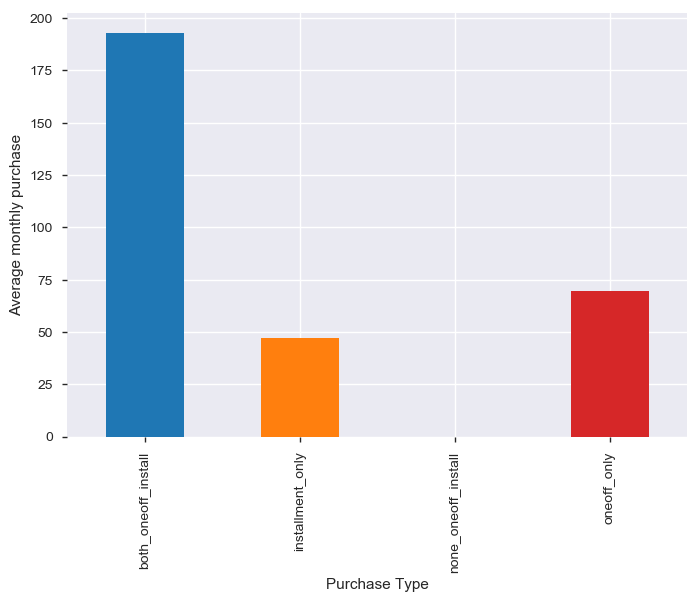

In [464]:
#1. AVERAGE monthly purchase by purchase type
pt["monthly_avg_pur"].mean().plot(kind="bar")
plt.xlabel("Purchase Type")
plt.ylabel("Average monthly purchase")
plt.show()

Average monthly purchase using both oneoff and installments are very high almost 193 whereas average monthly purchase using installments only is very low i.e around 47.

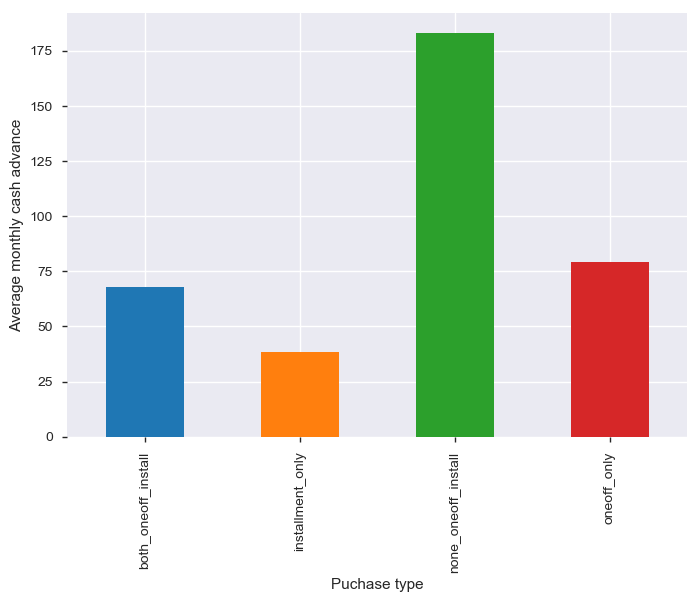

In [465]:
#average MONTHLY CASH ADVANCE
pt["monthly_cash_adv"].mean().plot(kind="bar")
plt.ylabel("Average monthly cash advance")
plt.xlabel("Puchase type")
plt.show()

Customers who didn't do either of oneoff or installment purchases take highest monthly cash advance

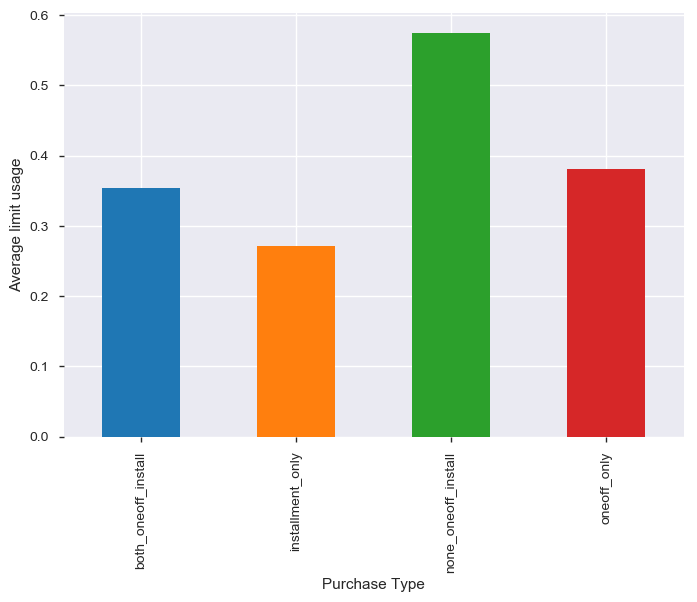

In [466]:
#average limit usage by purchase type
pt["limit_usage"].mean().plot(kind="bar")
plt.xlabel("Purchase Type")
plt.ylabel("Average limit usage")
plt.show()

Customers with installments only purchases have good balance to credit limit ratio.

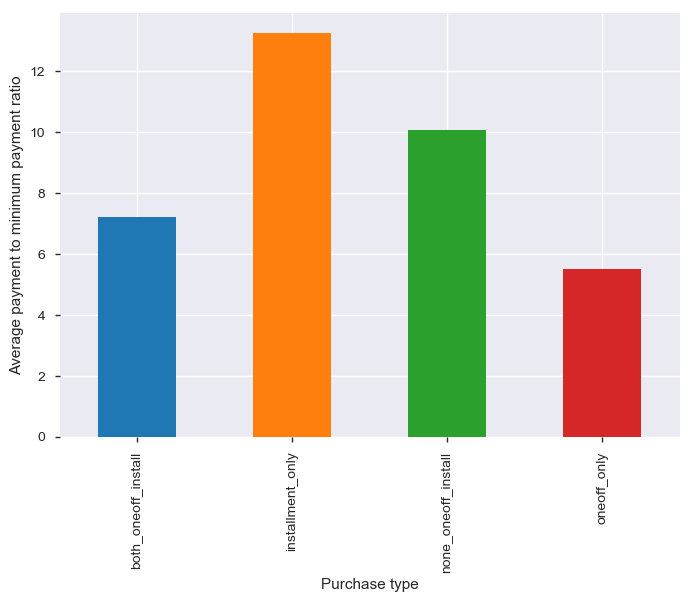

In [467]:
#average payments to minimum payment ratio
pt["pay_minpay"].mean().plot(kind="bar")
plt.xlabel("Purchase type")
plt.ylabel("Average payment to minimum payment ratio")
plt.show()

Customers with installments only purchases are paying their dues fast.

### One hot encoding for categorical variable purchase type

In [468]:
cc_dum = cc.join(pd.get_dummies(cc.purchase_type))

In [469]:
cc_dum.drop(columns=["purchase_type","CUST_ID"],inplace=True)

In [470]:
cc_dum.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,monthly_avg_pur,monthly_cash_adv,limit_usage,pay_minpay,both_oneoff_install,installment_only,none_oneoff_install,oneoff_only
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0.000000,12,7.950000,0.000000,0.040901,1.446508,0,1,0,0
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,0.222222,12,0.000000,536.912124,0.457495,3.826241,0,0,1,0
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0.000000,12,64.430833,0.000000,0.332687,0.991682,0,0,0,1
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0.000000,12,124.916667,17.149001,0.222223,0.000000,0,0,0,1
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0.000000,12,1.333333,0.000000,0.681429,2.771075,0,0,0,1


### Checking correlation between variables

In [471]:
cc_dum.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,PRC_FULL_PAYMENT,TENURE,monthly_avg_pur,monthly_cash_adv,limit_usage,pay_minpay,both_oneoff_install,installment_only,none_oneoff_install,oneoff_only
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,...,-0.318959,0.072692,0.179711,0.475431,0.503557,-0.039302,0.077758,-0.200831,0.152361,-0.031082
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,...,-0.095082,0.119776,0.131281,0.086020,0.404662,-0.088628,0.193949,-0.134502,0.011738,-0.088938
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,...,0.180379,0.086288,0.995845,-0.055473,-0.057408,0.016721,0.396686,-0.126853,-0.255291,-0.052136
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,...,0.132763,0.064150,0.913060,-0.034545,-0.042212,0.010249,0.317956,-0.207457,-0.194062,0.060271
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,...,0.182569,0.086143,0.677024,-0.067782,-0.058264,0.020694,0.353505,0.081506,-0.247149,-0.233936
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,...,-0.152935,-0.068312,-0.047502,0.976364,0.215199,-0.003291,-0.068598,-0.154909,0.261753,-0.026587
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,...,0.305802,0.061506,0.395337,-0.215786,-0.201781,0.011536,0.515593,0.295918,-0.664037,-0.217147
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,...,0.157531,0.082466,0.499711,-0.089034,-0.092006,-0.004466,0.525795,-0.394452,-0.368981,0.204113
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,...,0.250087,0.073275,0.314136,-0.179333,-0.161419,0.018024,0.463390,0.430024,-0.498338,-0.471909
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,...,-0.249773,-0.133372,-0.116109,0.628312,0.360131,-0.021741,-0.094894,-0.237116,0.373717,-0.024397


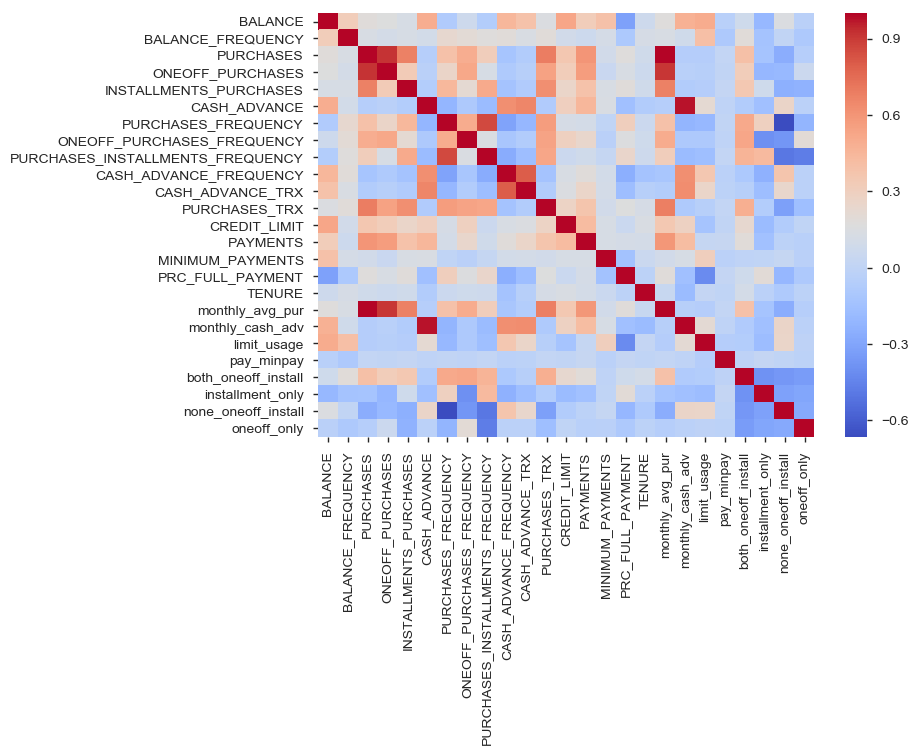

In [472]:
sns.heatmap(cc_dum.corr(),cmap="coolwarm")

Heatmap show how variables are corelated to each other. We will apply Prinicpal Component analysis(PCA) to help reduce the variables. Before applying we need to standardize the data.

### Standardize the data

In [473]:
#importing necesarry packages
from sklearn.preprocessing import StandardScaler

In [474]:
sc = StandardScaler()

In [475]:
cc_scaled = sc.fit_transform(cc_dum)

In [476]:
pd.DataFrame(cc_scaled).describe().T

,count,mean,std,min,25%,50%,75%,max
0,8950.0,4.195651e-16,1.000056,-0.751640,-0.690008,-0.332029,2.352559e-01,8.397489
1,8950.0,1.209548e-14,1.000056,-3.703271,0.049045,0.518084,5.180838e-01,0.518084
2,8950.0,-9.278518e-16,1.000056,-0.469552,-0.451001,-0.300454,5.004652e-02,22.483510
3,8950.0,3.916048e-15,1.000056,-0.356934,-0.356934,-0.334040,-9.056763e-03,24.201066
4,8950.0,2.275424e-15,1.000056,-0.454576,-0.454576,-0.356156,6.366321e-02,24.426889
5,8950.0,5.693056e-15,1.000056,-0.466786,-0.466786,-0.466786,6.435242e-02,22.011117
6,8950.0,-3.716084e-16,1.000056,-1.221758,-1.014125,0.024043,1.062211e+00,1.269843
7,8950.0,2.021052e-15,1.000056,-0.678661,-0.678661,-0.399319,3.269728e-01,2.673451
8,8950.0,2.353921e-16,1.000056,-0.916995,-0.916995,-0.497629,9.701506e-01,1.599199
9,8950.0,5.729495e-16,1.000056,-0.675349,-0.675349,-0.675349,4.351492e-01,6.820521


In [477]:
pd.DataFrame(cc_scaled).shape

(8950, 25)

### Applying PCA

In [478]:
#importing necessary libraries
from sklearn.decomposition import PCA

In [479]:
#initialising PCA for 25 components as there are 25 variables
pc =PCA(n_components=25)

In [480]:
pc.fit(cc_scaled)

PCA(copy=True, iterated_power='auto', n_components=25, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [481]:
#amount of variance explained by the each component: Eigen values
np.round(pc.explained_variance_,decimals=2)

array([6.06, 4.6 , 2.18, 1.79, 1.47, 1.26, 1.1 , 0.99, 0.89, 0.77, 0.72,
       0.61, 0.56, 0.43, 0.43, 0.28, 0.25, 0.21, 0.18, 0.17, 0.04, 0.02,
       0.  , 0.  , 0.  ])

In [482]:
#amount of variance explained by each component in percentage
pc.explained_variance_ratio_*100

array([2.42368791e+01, 1.83822073e+01, 8.70010917e+00, 7.17809505e+00,
       5.87590606e+00, 5.05913239e+00, 4.39262340e+00, 3.97022518e+00,
       3.57841436e+00, 3.06041764e+00, 2.88336862e+00, 2.43429399e+00,
       2.23208680e+00, 1.71382331e+00, 1.70552381e+00, 1.12621695e+00,
       9.95231955e-01, 8.51310856e-01, 7.14504208e-01, 6.81794325e-01,
       1.45363723e-01, 6.48807353e-02, 1.75444963e-02, 4.64928245e-05,
       5.89073821e-31])

In [483]:
#calculating the cum sum of variance percentage 
np.cumsum(np.round(a=pc.explained_variance_ratio_,decimals=4)*100)

array([ 24.24,  42.62,  51.32,  58.5 ,  64.38,  69.44,  73.83,  77.8 ,
        81.38,  84.44,  87.32,  89.75,  91.98,  93.69,  95.4 ,  96.53,
        97.53,  98.38,  99.09,  99.77,  99.92,  99.98, 100.  , 100.  ,
       100.  ])

##### number of components =8 . Since 1st 8 components are explaining more than 75% of cumulative variance along with more than 0.8 individual variance

In [484]:
#initialising PCA with final 8 components
pc_final = PCA(n_components=8)

In [485]:
#fitting the model and transform on cc_scaled
reduced_com = pc_final.fit_transform(cc_scaled)

In [486]:
#converting to dataframe
dimensions = pd.DataFrame(reduced_com)
dimensions.head()

,0,1,2,3,4,5,6,7
0,-1.404815,-2.005809,-0.271448,-0.471505,0.861222,0.384267,0.064817,-0.209213
1,-2.176565,3.207807,-0.235718,-1.369633,0.327851,-0.478716,1.156829,-0.581282
2,0.720295,-0.360533,2.098046,1.262394,-1.681675,1.832070,0.151118,0.116570
3,-0.771010,-0.297683,2.422170,-0.199764,0.276030,1.445122,0.417193,-0.035749
4,-1.658157,-0.832091,1.718655,1.220343,0.024214,1.040260,-0.467856,0.082661


#### Loading Matrix

Loadings=Eigenvectors * sqrt(Eigenvalues)

loadings are the covariances/correlations between the original variables and the unit-scaled components.

In [381]:
pd.DataFrame(pc_final.components_.T*np.sqrt(pc_final.explained_variance_))

,0,1,2,3,4,5,6,7
0,0.087958,0.751840,-0.137229,0.268929,0.108455,0.244657,0.152354,0.011925
1,0.194839,0.297231,-0.225801,0.555082,-0.131106,-0.041497,-0.125388,-0.102308
2,0.872401,0.228656,0.231264,-0.088203,0.281737,-0.053394,-0.129630,-0.012173
3,0.735727,0.251890,0.412207,-0.083376,0.205757,-0.037790,-0.156402,-0.018543
4,0.710922,0.077710,-0.210466,-0.055508,0.288239,-0.056684,-0.019260,0.005247
5,-0.181918,0.810164,-0.216091,-0.329331,-0.178782,0.092128,0.027013,-0.013975
6,0.734583,-0.269746,-0.416260,0.066940,-0.311315,0.139752,-0.097616,0.053670
7,0.641327,0.093907,0.357943,0.173726,-0.466453,0.014256,-0.032355,0.046628
8,0.628008,-0.266237,-0.659659,0.016263,-0.082782,0.000041,-0.026700,0.035366
9,-0.301152,0.748558,-0.160132,-0.054959,-0.168251,-0.113859,-0.168579,0.026620


In [391]:
#calculating factor loading matrix
loading = pd.DataFrame((pc_final.components_.T*np.sqrt(pc_final.explained_variance_)).T,columns=cc_dum.columns).T
loading

,0,1,2,3,4,5,6,7
BALANCE,0.087958,0.751840,-0.137229,0.268929,0.108455,0.244657,0.152354,0.011925
BALANCE_FREQUENCY,0.194839,0.297231,-0.225801,0.555082,-0.131106,-0.041497,-0.125388,-0.102308
PURCHASES,0.872401,0.228656,0.231264,-0.088203,0.281737,-0.053394,-0.129630,-0.012173
ONEOFF_PURCHASES,0.735727,0.251890,0.412207,-0.083376,0.205757,-0.037790,-0.156402,-0.018543
INSTALLMENTS_PURCHASES,0.710922,0.077710,-0.210466,-0.055508,0.288239,-0.056684,-0.019260,0.005247
CASH_ADVANCE,-0.181918,0.810164,-0.216091,-0.329331,-0.178782,0.092128,0.027013,-0.013975
PURCHASES_FREQUENCY,0.734583,-0.269746,-0.416260,0.066940,-0.311315,0.139752,-0.097616,0.053670
ONEOFF_PURCHASES_FREQUENCY,0.641327,0.093907,0.357943,0.173726,-0.466453,0.014256,-0.032355,0.046628
PURCHASES_INSTALLMENTS_FREQUENCY,0.628008,-0.266237,-0.659659,0.016263,-0.082782,0.000041,-0.026700,0.035366
CASH_ADVANCE_FREQUENCY,-0.301152,0.748558,-0.160132,-0.054959,-0.168251,-0.113859,-0.168579,0.026620


In [402]:
loading.to_excel("loading_matrix.xlsx")

### K means Clustering

In [414]:
#selecting variables based on factor loadings(done using excel "selected_vars.xlsx")
select_vars = ["monthly_avg_pur","monthly_cash_adv","pay_minpay","limit_usage","oneoff_only","installment_only","both_oneoff_install","none_oneoff_install","TENURE","BALANCE_FREQUENCY"]

In [415]:
cc_scaled1 = pd.DataFrame(cc_scaled,columns=cc_dum.columns)

cc_scaled2 = cc_scaled1[select_vars]
cc_scaled2.head()

,monthly_avg_pur,monthly_cash_adv,pay_minpay,limit_usage,oneoff_only,installment_only,both_oneoff_install,none_oneoff_install,TENURE,BALANCE_FREQUENCY
0,-0.433384,-0.460727,-0.064226,-0.892950,-0.514625,1.720516,-0.670193,-0.543690,0.36068,-0.249434
1,-0.477428,2.319396,-0.044088,0.176063,-0.514625,-0.581221,-0.670193,1.839282,0.36068,0.134325
2,-0.120468,-0.460727,-0.068075,-0.144206,1.943162,-0.581221,-0.670193,-0.543690,0.36068,0.518084
3,0.214636,-0.371929,-0.076467,-0.427664,1.943162,-0.581221,-0.670193,-0.543690,0.36068,-1.016953
4,-0.470041,-0.460727,-0.053017,0.750693,1.943162,-0.581221,-0.670193,-0.543690,0.36068,0.518084


In [416]:
#importing kmeans for clustering
from sklearn.cluster import KMeans

In [489]:
#let's observe kmeans with k=3
k3_means = KMeans(n_clusters=3,random_state=121)
k3_means.fit(cc_scaled2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=121, tol=0.0001, verbose=0)

In [495]:
pd.Series(k3_means.labels_).head(10)
#0-the customer belongs to 1st segment 
#1-the customer belongs to 2nd segment
#2-the customer belongs to 3rd segment

0    1
1    2
2    1
3    1
4    1
5    1
6    0
7    1
8    0
9    1
dtype: int32

In [497]:
#number of customers in each segment
pd.Series(k3_means.labels_).value_counts()

1    4107
0    2778
2    2065
dtype: int64

In [498]:
#percentage of customers in each segment
(pd.Series(k3_means.labels_).value_counts()/pd.Series(k3_means.labels_).value_counts().sum())*100

1    45.888268
0    31.039106
2    23.072626
dtype: float64

### Choosing number of clusters using Silhoutte Coefficient

In [501]:
#importing mterics for silhoutte coefficient calculation
from sklearn import metrics

In [539]:
#calculating sc for k=3 to 10 
k_range = range(3,11)
sc = []
for k in k_range:
    km = KMeans(n_clusters=k,random_state=121)
    km.fit(cc_scaled2)
    sc.append(metrics.silhouette_score(cc_scaled2,km.labels_))


In [540]:
sc

[0.3341186319954412,
 0.4336113600087935,
 0.4363103880224148,
 0.45169877265900865,
 0.4563741790734535,
 0.4583180272352728,
 0.46324334256169697,
 0.4543053227652771]

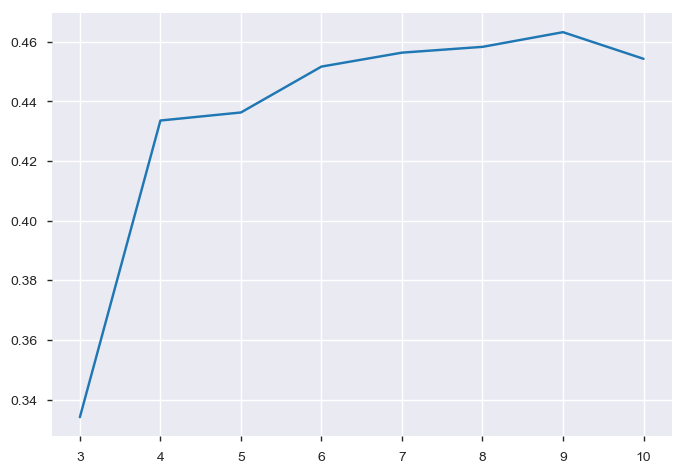

In [541]:
plt.plot(k_range,sc)
plt.show()

Based on Silhoutte coefficient there can be 9 or 8 clusters depending on the business requirement. However the best score is for 9 clusters.

### Profiling

In [566]:
#creating clusters from 3 to 10
km3 = KMeans(n_clusters=3).fit(cc_scaled2)
km4 = KMeans(n_clusters=4).fit(cc_scaled2)
km5 = KMeans(n_clusters=5).fit(cc_scaled2)
km6 = KMeans(n_clusters=6).fit(cc_scaled2)
km7 = KMeans(n_clusters=7).fit(cc_scaled2)
km8 = KMeans(n_clusters=8).fit(cc_scaled2)
km9 = KMeans(n_clusters=9).fit(cc_scaled2)
km10 = KMeans(n_clusters=10).fit(cc_scaled2)


In [567]:
#adding cluster labels to the dataframe containing the variables for profiling
cc_dum["cluster_3"] = km3.labels_
cc_dum["cluster_4"] = km4.labels_
cc_dum["cluster_5"] = km5.labels_
cc_dum["cluster_6"] = km6.labels_
cc_dum["cluster_7"] = km7.labels_
cc_dum["cluster_8"] = km8.labels_
cc_dum["cluster_9"] = km9.labels_
cc_dum["cluster_10"] = km10.labels_

In [569]:
cc_dum.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,...,none_oneoff_install,oneoff_only,cluster_3,cluster_4,cluster_5,cluster_6,cluster_7,cluster_8,cluster_9,cluster_10
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,...,0,0,1,1,3,3,1,0,2,6
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,...,1,0,0,3,4,2,0,4,7,2
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,...,0,1,1,0,1,0,3,2,0,7
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,...,0,1,1,0,1,0,3,2,0,4
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,...,0,1,1,0,1,0,3,2,0,7


In [574]:
cc_dum.shape[0]

8950

In [575]:
cc_dum.cluster_3.value_counts()

1    4106
2    2779
0    2065
Name: cluster_3, dtype: int64

In [588]:
#creating a series with overall size of data and value counts of each segment
size = pd.concat([pd.Series(cc_dum.shape[0]),pd.Series.sort_index(cc_dum.cluster_3.value_counts()),pd.Series.sort_index(cc_dum.cluster_4.value_counts()),
                 pd.Series.sort_index(cc_dum.cluster_5.value_counts()),pd.Series.sort_index(cc_dum.cluster_6.value_counts()),pd.Series.sort_index(cc_dum.cluster_7.value_counts()),
                 pd.Series.sort_index(cc_dum.cluster_8.value_counts()),pd.Series.sort_index(cc_dum.cluster_9.value_counts()),pd.Series.sort_index(cc_dum.cluster_10.value_counts())])
size
                 

0    8950
0    2065
1    4106
2    2779
0    1872
1    2253
2    2772
3    2053
0    2674
1    1732
2     634
3    2079
4    1831
0    1732
1    2674
2    1830
3    2075
4     633
5       6
0    1835
1    2074
2     120
3    1723
4     627
5       6
6    2565
0    1662
1    2517
2    1516
3       4
4    1699
5     611
6     120
7     821
0    1489
1    2491
2    1649
3     201
4       7
5     564
6     813
7    1618
8     118
0    2508
1     659
2    1637
3     197
4     423
5       4
6    1559
7    1289
8     118
9     556
dtype: int64

In [589]:
#creating dataframe from size
seg_size = pd.DataFrame(size,columns=["seg_size"])

In [591]:
#dataframe containing segment percentage count
seg_pct = pd.DataFrame(size/cc_dum.shape[0], columns=["seg_pct"])

In [604]:
#mean gives a very good indication of distribution of data so we are finding mean for each variable grouped by each clusters 
profiling_out = pd.concat([cc_dum.apply(lambda x:x.mean()).T,cc_dum.groupby("cluster_3").apply(lambda x:x.mean()).T,
                         cc_dum.groupby("cluster_4").apply(lambda x:x.mean()).T,cc_dum.groupby("cluster_5").apply(lambda x:x.mean()).T,
                         cc_dum.groupby("cluster_6").apply(lambda x:x.mean()).T,cc_dum.groupby("cluster_7").apply(lambda x:x.mean()).T,
                         cc_dum.groupby("cluster_8").apply(lambda x:x.mean()).T,cc_dum.groupby("cluster_9").apply(lambda x:x.mean()).T,
                         cc_dum.groupby("cluster_10").apply(lambda x:x.mean()).T],axis=1)
profiling_out

,0,0,1,2,0,1,2,3,0,1,...,0,1,2,3,4,5,6,7,8,9
BALANCE,1564.474828,2196.122845,1082.194880,1807.687605,1435.412825,829.679455,1801.486398,2168.518651,1818.654312,1451.960020,...,1704.501621,56.138113,2245.452120,5242.015998,117.620848,0.647470,1072.249590,1784.848196,3889.183243,900.532534
BALANCE_FREQUENCY,0.877271,0.883178,0.828101,0.945530,0.836156,0.822095,0.945721,0.882890,0.949652,0.841915,...,0.956856,0.328267,0.947477,0.925433,0.398604,0.303977,0.967149,0.978264,0.978062,0.805962
PURCHASES,1003.204834,13.334847,609.335192,2320.696833,764.146389,520.878007,2292.890588,9.142893,2337.310194,768.960081,...,1849.173469,272.519135,0.000000,772.322843,523.671702,547.840000,599.299429,768.187820,13859.832797,405.668741
ONEOFF_PURCHASES,592.437371,8.408547,326.673066,1419.082839,764.215112,0.000000,1393.464076,4.394233,1421.227191,769.034359,...,1080.655411,14.802003,0.000000,487.661421,523.671702,0.000000,0.000000,768.287626,9691.953220,235.108849
INSTALLMENTS_PURCHASES,411.067645,4.926300,283.229700,901.742159,0.000000,521.855286,899.555000,4.748660,916.216200,0.000000,...,768.660072,258.778589,0.000000,284.661421,0.000000,547.840000,600.243823,0.000000,4167.879576,170.613849
CASH_ADVANCE,978.871112,2148.397605,568.165214,716.649526,860.090049,385.421427,717.108958,2091.878897,697.978816,836.212758,...,583.288596,247.586585,1588.402676,10498.020155,171.293429,26.109482,404.380965,853.887925,597.952658,1065.310279
PURCHASES_FREQUENCY,0.490351,0.005963,0.525509,0.798338,0.320632,0.694957,0.798941,0.003903,0.800086,0.321021,...,0.798244,0.382424,0.000204,0.271554,0.181192,0.583333,0.755332,0.366336,0.916525,0.438663
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.002535,0.144661,0.436411,0.320409,0.000000,0.436370,0.001253,0.438804,0.320780,...,0.426798,0.008279,0.000000,0.133681,0.180798,0.000000,0.000000,0.366142,0.762943,0.128301
PURCHASES_INSTALLMENTS_FREQUENCY,0.364437,0.004078,0.360979,0.637320,0.000000,0.658881,0.638659,0.003357,0.641355,0.000000,...,0.638652,0.356229,0.000204,0.187051,0.000000,0.583333,0.727162,0.000000,0.728659,0.298700
CASH_ADVANCE_FREQUENCY,0.135144,0.276561,0.084182,0.105358,0.125391,0.052199,0.105504,0.275083,0.101232,0.117910,...,0.098177,0.022590,0.265112,0.529651,0.025761,0.031250,0.059803,0.139708,0.059322,0.213593


In [606]:
#adding segment size and segment percentage to profile
profiling_out = pd.concat([seg_size.T,seg_pct.T,profiling_out])
profiling_out

,0,0,1,2,0,1,2,3,0,1,...,0,1,2,3,4,5,6,7,8,9
seg_size,8950.000000,2065.000000,4106.000000,2779.000000,1872.000000,2253.000000,2772.000000,2053.000000,2674.000000,1732.000000,...,2508.000000,659.000000,1637.000000,197.000000,423.000000,4.000000,1559.000000,1289.000000,118.000000,556.000000
seg_pct,1.000000,0.230726,0.458771,0.310503,0.209162,0.251732,0.309721,0.229385,0.298771,0.193520,...,0.280223,0.073631,0.182905,0.022011,0.047263,0.000447,0.174190,0.144022,0.013184,0.062123
BALANCE,1564.474828,2196.122845,1082.194880,1807.687605,1435.412825,829.679455,1801.486398,2168.518651,1818.654312,1451.960020,...,1704.501621,56.138113,2245.452120,5242.015998,117.620848,0.647470,1072.249590,1784.848196,3889.183243,900.532534
BALANCE_FREQUENCY,0.877271,0.883178,0.828101,0.945530,0.836156,0.822095,0.945721,0.882890,0.949652,0.841915,...,0.956856,0.328267,0.947477,0.925433,0.398604,0.303977,0.967149,0.978264,0.978062,0.805962
PURCHASES,1003.204834,13.334847,609.335192,2320.696833,764.146389,520.878007,2292.890588,9.142893,2337.310194,768.960081,...,1849.173469,272.519135,0.000000,772.322843,523.671702,547.840000,599.299429,768.187820,13859.832797,405.668741
ONEOFF_PURCHASES,592.437371,8.408547,326.673066,1419.082839,764.215112,0.000000,1393.464076,4.394233,1421.227191,769.034359,...,1080.655411,14.802003,0.000000,487.661421,523.671702,0.000000,0.000000,768.287626,9691.953220,235.108849
INSTALLMENTS_PURCHASES,411.067645,4.926300,283.229700,901.742159,0.000000,521.855286,899.555000,4.748660,916.216200,0.000000,...,768.660072,258.778589,0.000000,284.661421,0.000000,547.840000,600.243823,0.000000,4167.879576,170.613849
CASH_ADVANCE,978.871112,2148.397605,568.165214,716.649526,860.090049,385.421427,717.108958,2091.878897,697.978816,836.212758,...,583.288596,247.586585,1588.402676,10498.020155,171.293429,26.109482,404.380965,853.887925,597.952658,1065.310279
PURCHASES_FREQUENCY,0.490351,0.005963,0.525509,0.798338,0.320632,0.694957,0.798941,0.003903,0.800086,0.321021,...,0.798244,0.382424,0.000204,0.271554,0.181192,0.583333,0.755332,0.366336,0.916525,0.438663
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.002535,0.144661,0.436411,0.320409,0.000000,0.436370,0.001253,0.438804,0.320780,...,0.426798,0.008279,0.000000,0.133681,0.180798,0.000000,0.000000,0.366142,0.762943,0.128301


In [612]:
#renaming the columns for better understanding 
profiling_out.columns = ['Overall', 'KM3_1', 'KM3_2', 'KM3_3',
                                'KM4_1', 'KM4_2', 'KM4_3', 'KM4_4',
                                'KM5_1', 'KM5_2', 'KM5_3', 'KM5_4', 'KM5_5',
                                'KM6_1', 'KM6_2', 'KM6_3', 'KM6_4', 'KM6_5','KM6_6',
                                'KM7_1', 'KM7_2', 'KM7_3', 'KM7_4', 'KM7_5','KM7_6','KM7_7',
                                'KM8_1', 'KM8_2', 'KM8_3', 'KM8_4', 'KM8_5','KM8_6','KM8_7','KM8_8',
                                'KM9_1', 'KM9_2', 'KM9_3', 'KM9_4', 'KM9_5','KM9_6','KM9_7','KM9_8','KM9_9',
                                'KM10_1','KM10_2','KM10_3','KM10_4','KM10_5','KM_10_6','KM10_7','KM10_8','KM10_9','KM10_10']

In [623]:
#removing last 8 columns contaiing clusters
profiling_out = profiling_out[:27]

In [624]:
profiling_out

,Overall,KM3_1,KM3_2,KM3_3,KM4_1,KM4_2,KM4_3,KM4_4,KM5_1,KM5_2,...,KM10_1,KM10_2,KM10_3,KM10_4,KM10_5,KM_10_6,KM10_7,KM10_8,KM10_9,KM10_10
seg_size,8950.000000,2065.000000,4106.000000,2779.000000,1872.000000,2253.000000,2772.000000,2053.000000,2674.000000,1732.000000,...,2508.000000,659.000000,1637.000000,197.000000,423.000000,4.000000,1559.000000,1289.000000,118.000000,556.000000
seg_pct,1.000000,0.230726,0.458771,0.310503,0.209162,0.251732,0.309721,0.229385,0.298771,0.193520,...,0.280223,0.073631,0.182905,0.022011,0.047263,0.000447,0.174190,0.144022,0.013184,0.062123
BALANCE,1564.474828,2196.122845,1082.194880,1807.687605,1435.412825,829.679455,1801.486398,2168.518651,1818.654312,1451.960020,...,1704.501621,56.138113,2245.452120,5242.015998,117.620848,0.647470,1072.249590,1784.848196,3889.183243,900.532534
BALANCE_FREQUENCY,0.877271,0.883178,0.828101,0.945530,0.836156,0.822095,0.945721,0.882890,0.949652,0.841915,...,0.956856,0.328267,0.947477,0.925433,0.398604,0.303977,0.967149,0.978264,0.978062,0.805962
PURCHASES,1003.204834,13.334847,609.335192,2320.696833,764.146389,520.878007,2292.890588,9.142893,2337.310194,768.960081,...,1849.173469,272.519135,0.000000,772.322843,523.671702,547.840000,599.299429,768.187820,13859.832797,405.668741
ONEOFF_PURCHASES,592.437371,8.408547,326.673066,1419.082839,764.215112,0.000000,1393.464076,4.394233,1421.227191,769.034359,...,1080.655411,14.802003,0.000000,487.661421,523.671702,0.000000,0.000000,768.287626,9691.953220,235.108849
INSTALLMENTS_PURCHASES,411.067645,4.926300,283.229700,901.742159,0.000000,521.855286,899.555000,4.748660,916.216200,0.000000,...,768.660072,258.778589,0.000000,284.661421,0.000000,547.840000,600.243823,0.000000,4167.879576,170.613849
CASH_ADVANCE,978.871112,2148.397605,568.165214,716.649526,860.090049,385.421427,717.108958,2091.878897,697.978816,836.212758,...,583.288596,247.586585,1588.402676,10498.020155,171.293429,26.109482,404.380965,853.887925,597.952658,1065.310279
PURCHASES_FREQUENCY,0.490351,0.005963,0.525509,0.798338,0.320632,0.694957,0.798941,0.003903,0.800086,0.321021,...,0.798244,0.382424,0.000204,0.271554,0.181192,0.583333,0.755332,0.366336,0.916525,0.438663
ONEOFF_PURCHASES_FREQUENCY,0.202458,0.002535,0.144661,0.436411,0.320409,0.000000,0.436370,0.001253,0.438804,0.320780,...,0.426798,0.008279,0.000000,0.133681,0.180798,0.000000,0.000000,0.366142,0.762943,0.128301


In [626]:
#exporting as excel file for better profiling using excel
profiling_out.to_excel("profiling_output.xlsx")
#to make sure the file is not overwritten by above code, filename has been changed to "profiling_output_final.xlsx"
#can be found in current directory

> ### Insights with 9 clusters

#### Segment 9: These are the customers with highest transactions but consists only 1.3% of total customers.
#### Segment 7: These are the customers with lowest transactions with 9% of total customers.
#### Segment 1: Customers of this segment do 100% purchases one off purchases.
#### Segment 2: This is the largest segment consisting of 27.8% of total customers. All the purchases made by these customers are              done using both one off and installments.
#### Segment 3: Less transacting customers and prefer only purchasing through installments. Second highest segment consisting of 18.4% customers.
#### Segment 4: Customers with highest balance, highest monthly cash advance and highest minimum payment amount. Consists of 2.2% of customers.
#### Segment 5: Customers with lowest balance and highest payment to minimum payment ratio and almost zero limit usage. Lowest segment consisting of only 0.1% customers.
#### Segment 6: Customers with lowest credit limit and lowest payments. But these are newest customers. Overall low transacting segment. Consist of 6.3% of customers.
#### Segment 8: Third highest segment. These customers have taken cash advance only and not done any purchase at all.

>### Strategies

#### Segment 9: These are the highest transacting customers hence they should be given reward points to increase their purchases even more.
#### Segment 7: These are performing low but consists of significant number of customers so lowering interests rate might encourage them to purchase more.
#### Segment 1: Customers use credit card to do only oneoff purchases and that too less frequently so they should be encouraged to increase purchase frequency.
#### Segment 2: This is the largest group and with good purchase frequency. These customers should be maintained.
#### Segment 3: Prefers only installment purchases and purchase amount is less. They can be offered less interest rate on installments, so they purchase more.
#### Segment 4: These customers have highest balance and monthly cash advance. These are risky customers. Credit limit may be decreased for them.
#### Segment 5: These customers have very good limit usage(almost zero). But there purchase amount is also low. They should be offered reward points and encourage them to make purchases of bigger amount.
#### Segment 6: Customers with lowest credit limit. To increase their transactions , credit limit may be increased.
#### Segment 8: These customers take only cash advance therefore they should be motivated using offers on purchase so that they start purchasing also.